# Count-Min Sketch

Создается таблица (матрица), заполненная нулями.

Для каждого элемента вычисляется несколько хэш-функций.

Каждая хэш-функция определяет индекс в своей строке таблицы.

В соответствующие ячейки таблицы добавляется значение (обычно 1 или вес элемента).

Для оценки частоты элемента снова вычисляются те же хэш-функции. Возвращается минимальное значение из всех соответствующих ячеек таблицы.

Возможны ложноположительные срабатывания (оценка может быть завышена). Точность зависит от ширины таблицы и количества хэш-функций.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [45]:
def get_hashes(item, size_arr, count=1):
    # Преобразуем входной элемент в строку и затем в число (например, используя хеш Python)
    seed_value = hash(item) % 442
    hashes = []

    def truncate_to_power_of_two(arr):
        # Находим максимальную степень двойки, не превышающую длину массива
        length = len(arr)
        power = math.floor(math.log2(length))
        
        # Обрезаем массив до найденной длины
        return str(arr[:power]) 

    # Создаем три разных хеша с разными seed-ами
    def generate_binary_hash(seed, length=size_arr):
        np.random.seed(seed)  # Задаем seed для детерминированности
        binary_string = ''.join(str(np.random.randint(0, 2)) for _ in range(length))

        return truncate_to_power_of_two(binary_string)
    
    # Генерируем три разных хеша
    for i in range(count):
        hashes.append(generate_binary_hash(seed_value + i))

    return hashes

In [46]:
class CountMinSketch:
    def __init__(self, hashes, lenght_row,):
       self.hashes = hashes
       self.lenght_row = lenght_row
       self.table = [[0] * self.lenght_row for _ in range(self.hashes)]

    def add_element(self, item):
        hashes = get_hashes(item, size_arr= self.lenght_row, count = self.hashes)
        #for i, hash_value in enumerate(int(hashes,2)):
        for i in range(self.hashes):  # Перебираем все хеш-функции
            hash_value = int(hashes[i], 2)
            self.table[i][hash_value] += 1
        
        return hashes
    
    def estimate(self, item):
        min_count = float('inf')
        hash_indexes = get_hashes(item, size_arr=self.lenght_row, count=self.hashes)
        for i in range(self.hashes):
            min_count = min(min_count, self.table[i][int(hash_indexes[i],2)])
        return min_count

In [47]:
cms = CountMinSketch(3, 128)
items = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple', 'grape', 'banana']
for item in items:
    cms.add_element(item)

# Оцениваем частоты
print(f"Частота 'apple': {cms.estimate('apple')}")
print(f"Частота 'banana': {cms.estimate('banana')}")
print(f"Частота 'orange': {cms.estimate('orange')}")
print(f"Частота 'grape': {cms.estimate('grape')}")
print(f"Частота 'cherry': {cms.estimate('cherry')}")

Частота 'apple': 3
Частота 'banana': 3
Частота 'orange': 1
Частота 'grape': 1
Частота 'cherry': 0


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Функция для расчета вероятности ложноположительного срабатывания
def false_positive_probability(w, d):
    return (1 / w) ** d

# Генерация данных для анализа
w_values = [10, 12, 15, 20, 30, 50, 100, 300, 500]  # Ширина таблицы
d_values = [1, 2, 3, 4, 5, 6]          # Глубина таблицы

# Создание DataFrame для хранения результатов
data = []
for w in w_values:
    for d in d_values:
        prob = false_positive_probability(w, d)
        data.append({'Width (w)': w, 'Depth (d)': d, 'False Positive Probability': prob})

df = pd.DataFrame(data)

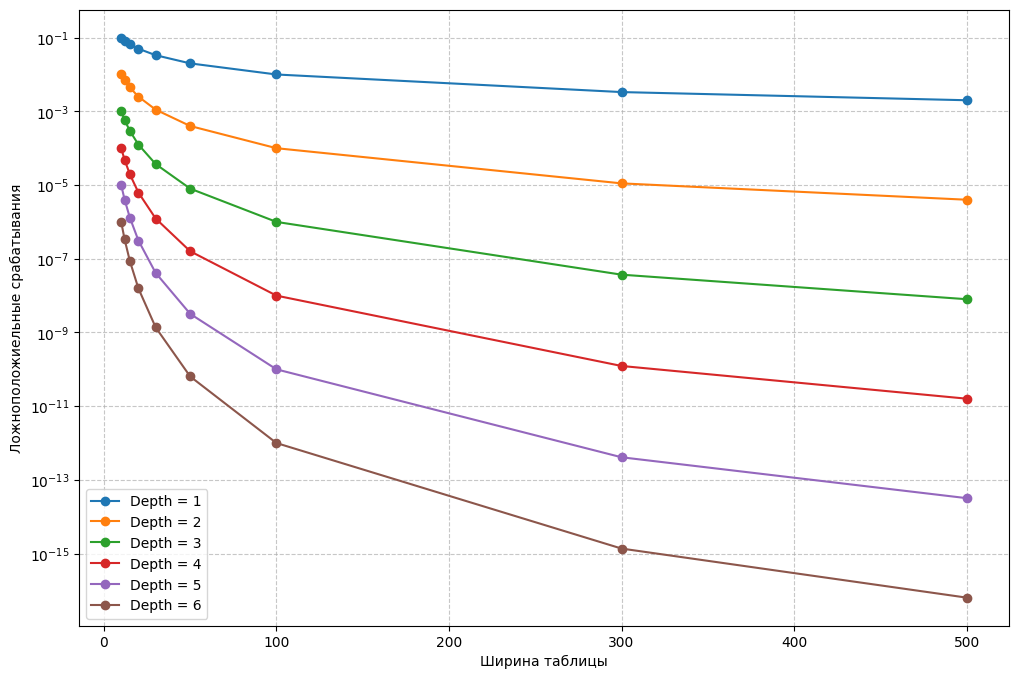

In [ ]:
plt.figure(figsize=(12, 8))

# График 1: Зависимость вероятности от ширины для разных значений глубины
for d in d_values:
    subset = df[df['Depth (d)'] == d]
    plt.plot(subset['Width (w)'], subset['False Positive Probability'], 
             marker='o', label=f'Depth = {d}')

plt.xlabel('Ширина таблицы')
plt.ylabel('Ложноположиельные срабатывания')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()